# 梯度提升树（GBDT）

In [ ]:
#与随机森林方法不
#同，梯度提升采用连续的方式构造树，每棵树都试图纠正前一棵树的错误。默认情况下，
#梯度提升回归树中没有随机化，而是用到了强预剪枝。梯度提升树通常使用深度很小（1监督学习 ｜ 69
#到 5 之间）的树，这样模型占用的内存更少，预测速度也更快。

In [1]:
import numpy as pd
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer['data'],cancer['target'],
                                               random_state=0)

In [4]:
gbrt=GradientBoostingClassifier(random_state=0)#默认使用 100 棵树，
#最大深度是 3，学习率为 0.1
gbrt.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [5]:
#由于训练集精度达到 100%，所以很可能存在过拟合。为了降低过拟合，我们可以限制最
#大深度来加强预剪枝，也可以降低学习率
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [8]:
gbrt=GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


### 特征重要性

Text(0.5,0,'feature importance')

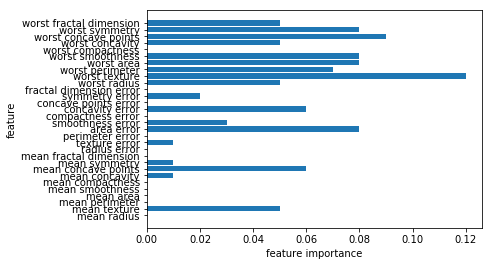

In [9]:
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)
n_features=cancer['data'].shape[1]
plt.barh(range(n_features),gbrt.feature_importances_,align='center')
plt.yticks(range(n_features),cancer['feature_names'])
plt.ylabel('feature')
plt.xlabel('feature importance')

### 优点缺点和参数

In [ ]:
'''
由于梯度提升和随机森林两种方法在类似的数据上表现得都很好，因此一种常用的方法就
是先尝试随机森林，它的鲁棒性很好。如果随机森林效果很好，但预测时间太长，或者机
器学习模型精度小数点后第二位的提高也很重要，那么切换成梯度提升通常会有用。

梯度提升决策树是监督学习中最强大也最常用的模型之一。其主要缺
点是需要仔细调参，而且训练时间可能会比较长。与其他基于树的模型类似，这一算法不
需要对数据进行缩放就可以表现得很好，而且也适用于二元特征与连续特征同时存在的数
据集。与其他基于树的模型相同，它也通常不适用于高维稀疏数据。
梯度提升树模型的主要参数包括树的数量 n_estimators 和学习率 learning_rate，后者
用于控制每棵树对前一棵树的错误的纠正强度。这两个参数高度相关，因为 learning_
rate 越低，就需要更多的树来构建具有相似复杂度的模型。随机森林的 n_estimators 值
总是越大越好，但梯度提升不同，增大 n_estimators 会导致模型更加复杂，进而可能导
致过拟合。通常的做法是根据时间和内存的预算选择合适的 n_estimators，然后对不同的
learning_rate 进行遍历。
另一个重要参数是 max_depth（或 max_leaf_nodes），用于降低每棵树的复杂度。梯度提升
模型的 max_depth 通常都设置得很小，一般不超过 5

'''